In [21]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')

import pandas as pd
df = pd.read_csv('bbc-news-data-modified.csv')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english')) 
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

import string
def process_text(text):
    # Remove punctuation and split the text
    remove_punctuation = str.maketrans('', '', string.punctuation)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Clean the text to not contain stop words and non alpha words
    cleaned_words = [word.lower().translate(remove_punctuation) for word in words if word.lower().isalpha() and word.lower() not in stop_words]
    
    # Return the words in the text that have been stemmed and lemmatized
    processed_words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in cleaned_words]
    return " ".join(processed_words)

clean_data_column = "processed_data"
df[clean_data_column] = df['content'] + ' ' + df['title']
df[clean_data_column] = df[clean_data_column].apply(process_text)


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Create a TfidfVectorizer with your choice of parameters
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform your cleaned and preprocessed content
tfidf_matrix = tfidf_vectorizer.fit_transform(df[clean_data_column])
pca = PCA(n_components=2)

# TF-IDF matrix
X_pca = pca.fit_transform(tfidf_matrix.toarray())

[nltk_data] Downloading package stopwords to /home/fil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/tmp/ipykernel_1720/2087432665.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="blue", cmap='viridis', marker='o', edgecolor='k', s=50)


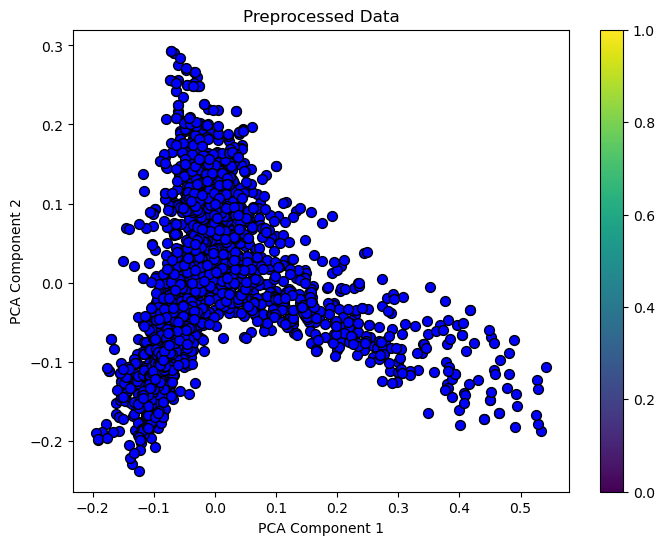

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="blue", cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Preprocessed Data")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


/home/fil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


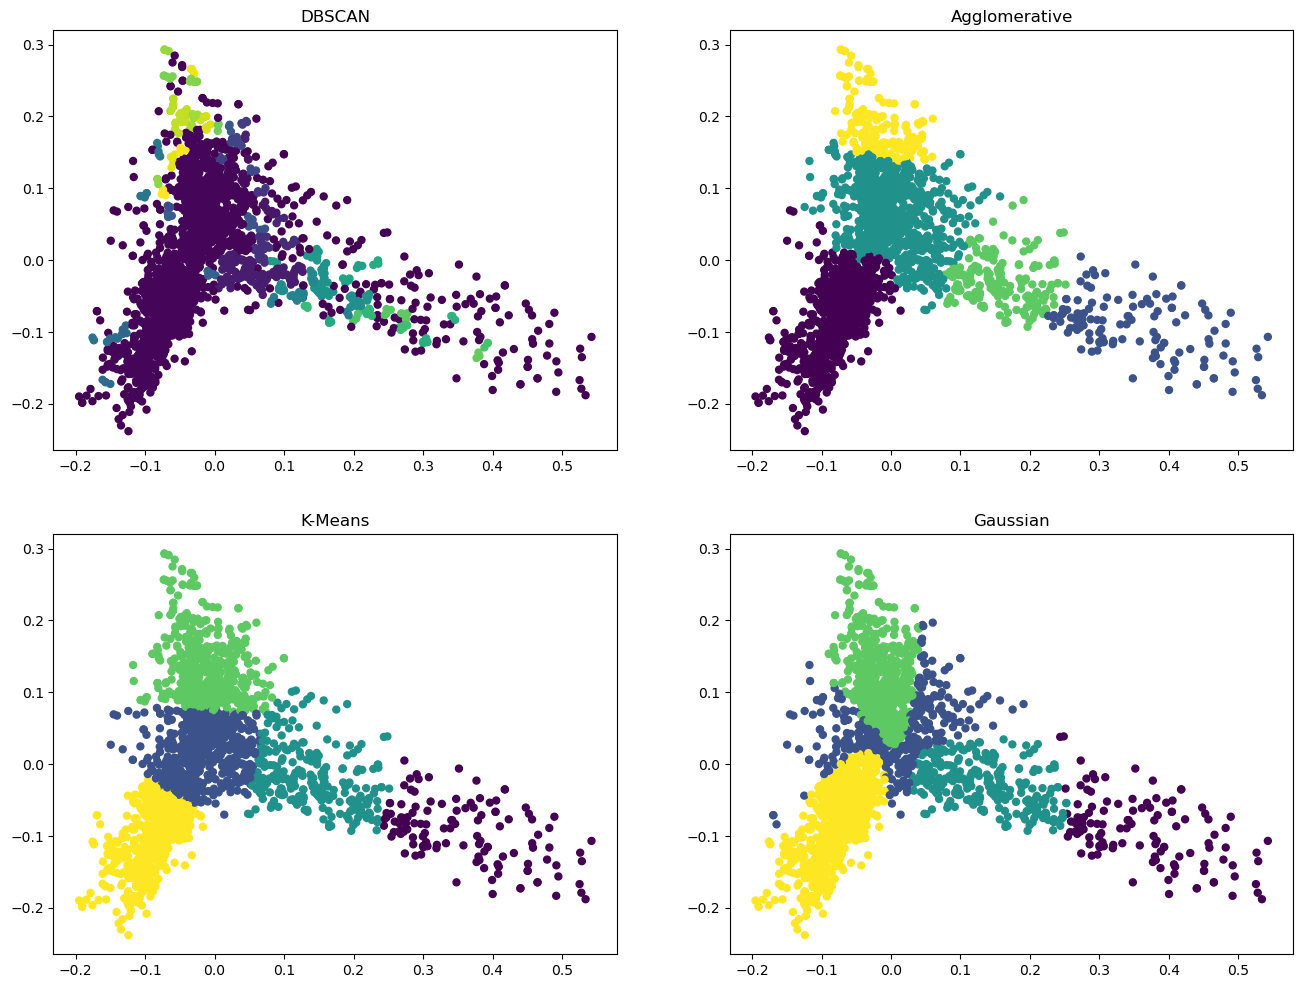

In [96]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Create a figure with four subplots arranged side by side
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Adjust the figsize as needed

# Plot DBSCAN results
db_scan = DBSCAN(eps=0.008, min_samples=3).fit(X_pca)
axes[0][0].scatter(X_pca[:, 0], X_pca[:, 1], c=db_scan.labels_, cmap='viridis', s=25)
axes[0][0].set_title("DBSCAN")

# Plot AgglomerativeClustering results
agglo = AgglomerativeClustering(n_clusters=5).fit(X_pca)
axes[0][1].scatter(X_pca[:, 0], X_pca[:, 1], c=agglo.labels_, cmap='viridis', s=25)
axes[0][1].set_title("Agglomerative")

# Plot K-Means results
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0).fit(X_pca)
axes[1][0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=25)
axes[1][0].set_title("K-Means")

# Plot Gaussian Mixture Model results
gmm = GaussianMixture(n_components=5, random_state=0).fit(X_pca)
axes[1][1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm.predict(X_pca), cmap='viridis', s=25)
axes[1][1].set_title("Gaussian")

# Show the combined plot
plt.show()


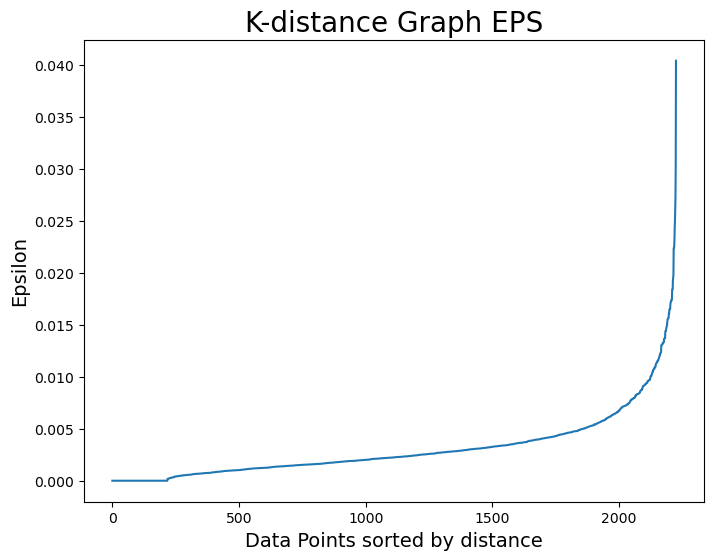

0.009206930494459342


In [100]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neigh = NearestNeighbors(n_neighbors=2).fit(X_pca)
distances, indices = neigh.kneighbors(X_pca)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph EPS',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

print(distances[2150])

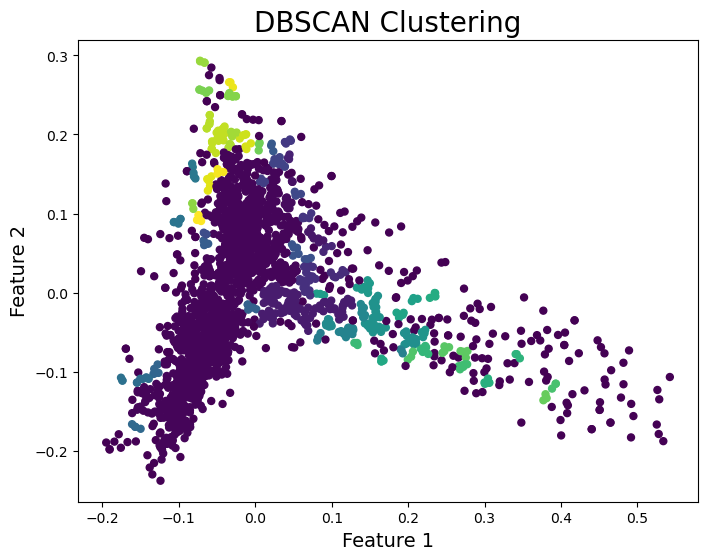

In [95]:
# Plot DBSCAN results
db_scan = DBSCAN(eps=0.008, min_samples=3).fit(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_scan.labels_, cmap='viridis', s=25)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

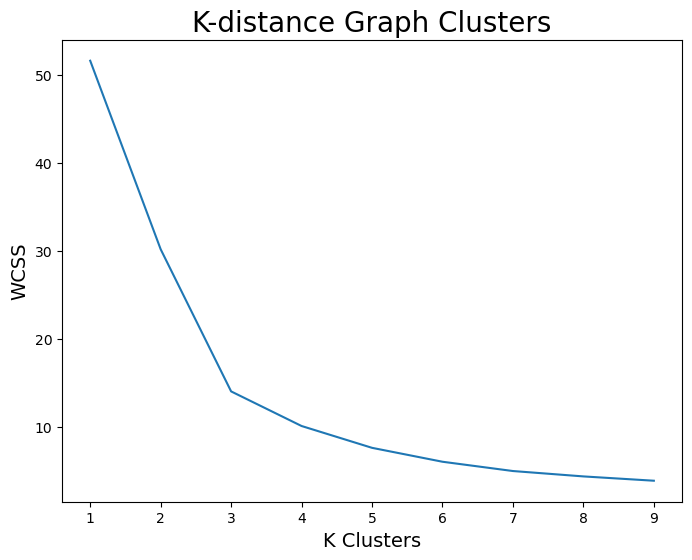

In [75]:
from sklearn.cluster import KMeans

wcss = []
cluster_range = range(1, 10)
for i in cluster_range: 
    kmeans = KMeans(n_clusters = i, n_init=10, max_iter=300, init = 'k-means++', random_state = 0).fit(X_pca) 
    wcss.append(kmeans.inertia_)
    
    
# Plotting K-distance Graph
plt.figure(figsize=(8,6))
plt.plot(cluster_range, wcss)
plt.title('K-distance Graph Clusters',fontsize=20)
plt.xlabel('K Clusters',fontsize=14)
plt.ylabel('WCSS',fontsize=14)
plt.show()

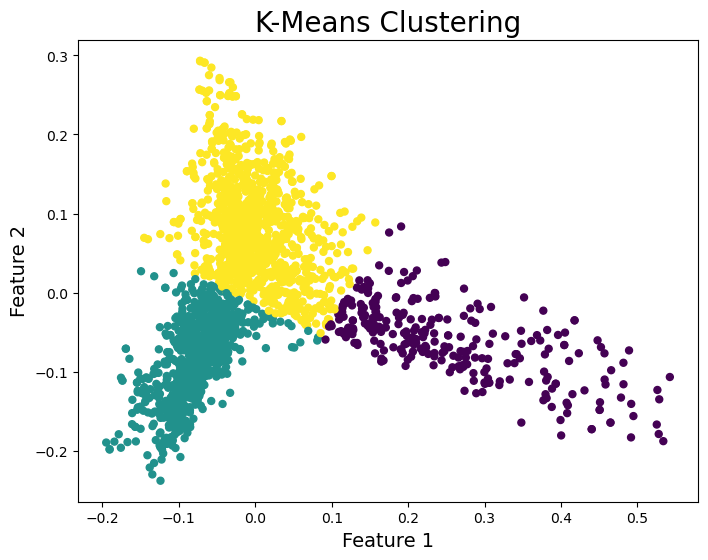

In [72]:
# Plot K-Means results
kmeans = KMeans(n_clusters = 3, n_init=10, init = 'k-means++', random_state = 0).fit(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=25)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()